## 사이킷런으로 수행하는 타이타닉 생존자 예측

* 캐글에서 제공하는 타이타닉 탑승자 데이터 

* 캐글 : 데이터 분석 오픈 포탈
    - 세계적인 ML 기반 분석 대회를 온라인 상에서 주관
    
캐글사이트 : https://www.kaggle.com/c/titanic/data

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import warnings
warnings.filterwarnings(action='ignore') 

## 변수 별 정보

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
titanic_df = pd.read_csv('datasets/titanic/train.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


* PassengerId : id
* Survived : 생존 여부 (0 = 사망, 1 = 생존)
* Pclass : 티켓 클래스 (1 = 1등석, 2 = 2등석, 3 = 3등석)
* Sex : 성별
* Age : 나이
* SibSp : 함께 탑승한 자녀 / 배우자 의 수
* Parch : 함께 탑승한 부모님 / 아이들 의 수
* Ticket : 티켓 번호
* Fare : 탑승 요금
* Cabin : 수하물 번호
* Boat : 탈출한 보트가 있다면 boat 번호
* Embarked : 선착장 (C = Cherbourg, Q = Queenstown, S = Southampton)

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [7]:
titanic_df['Age'].mean()

29.69911764705882

In [8]:
titanic_df['Age'].min()

0.42

In [9]:
titanic_df['Age'].max()

80.0

In [10]:
# 변수들의 기술통계량
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 결측치 파악

* isnull() 메서드

In [11]:
# Null 값 개수 확인
titanic_df['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [12]:
# 컬럼별로 Null 값 확인하기
titanic_df['Age'].isnull().sum()

177

In [14]:
titanic_df['Cabin'].isnull().sum()

687

In [15]:
titanic_df['Embarked'].isnull().sum()

2

In [17]:
titanic_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
# 변수별 Null 값 한번에 파악하기
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##  데이터 전처리 : 결측치 처리

### 결측치 발생 원인
* 미응답, 다른 변수나 문항의 응답 여부에 의존적인 경우
* 기록 누락
* 수집시 오류

### 결측치 처리 방법
* 완전제거
* 평균값 대체: 전체 평균 또는 기준 속성의 평균
    - 응답률이 높은 집단의 값이 평균에 큰 영향을 미치므로 사용에 주의
    - 관측값에서 계산한 평균값을 이욯아므로 표준오차 과소추정 발생
* 핫덱(hot-decx) 대체: 동일한 조사에서 다른 관측값으로부터 얻은 자료로 대체
    - 결측치와 비슷한 특성을 가진 것을 골라서 무작위 추출하여 대체

### NULL 컬럼들에 대한 처리

- 사이킷 머신러닝 알고리즘은 Null 값을 허용하지 않으므로 Null 값을 어떻게 처리할지 결정
- DataFrame()의 fillna() 메서드를 사용해서 Null 값을 평균 또는 고정 값으로 변경
- Age: 평균 나이로 변경
- 나머지 칼럼: 'N'으로 변경

In [20]:
# 연령에 대한 Null값 처리

titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

In [19]:
titanic_df['Cabin'].fillna('N', inplace=True)

In [21]:
titanic_df['Cabin'].isnull().sum()

0

In [24]:
titanic_df['Embarked'].fillna('N', inplace=True)

In [25]:
# Null 유무 확인
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 문자열 변수(피처) 빈도 분포 확인 : value_counts()

In [26]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [27]:
titanic_df['Cabin'].value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [28]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [30]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [31]:
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### 문자열 변수 Cabin값 변경

In [32]:
# 첫번째 문자 열만 확인
titanic_df['Cabin'].str[:1]

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [33]:
# 첫번째 문자 열로 값 변환
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]

In [34]:
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

## 성별에 따른 생존자수 분포(EDA)

머신러닝 알고리즘 적용해서 예측 수행 전에 데이터 탐색
- 어떤 유형의 승객이 생존 확률이 높았는지 확인
- 성별이 생존 확률에 어떤 영향을 미쳤는지 확인
- 성별에 따른 생존자 수 비교

In [35]:
# 성별(Sex) 분포 확인
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [36]:
# 제목이 나오는 분포 확인
# groupby : 앞 () 기준으로 []의 값을 카운트 / value_counts와 같은 값이 나옴!
titanic_df.groupby('Sex')['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

In [37]:
# 성별에 따른 Pclass
titanic_df.groupby(['Sex', 'Pclass'])['Pclass'].count()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Pclass, dtype: int64

In [38]:
# 생존(Survived) 분포 확인
titanic_df.groupby('Survived')['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [45]:
# 성별(Sex) * 생존(Survived) 확인
# 사망 : 0
# 생존 : 1
# Survived 칼럼 : 레이블로 결정 클래스 값

# titanic_df.groupby('Sex')['Survived'].value_counts()
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()
# titanic_df.groupby(['Sex', 'Survived'])['Survived'].value_counts()
# titanic_df.groupby(['Survived', 'Sex'])['Sex'].count()

# Pclass와 Survived의 비교
titanic_df.groupby(['Pclass', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

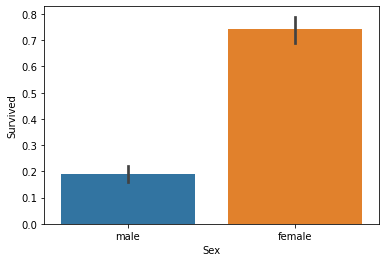

In [46]:
# 성별 생존자 : 막대 그래프(braplot)
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<Figure size 504x360 with 0 Axes>

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

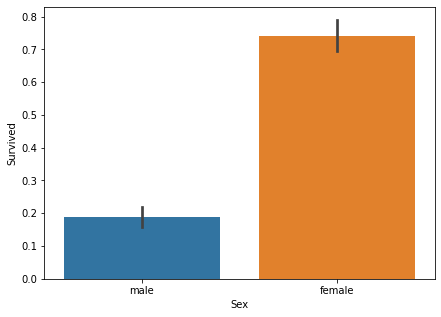

In [50]:
plt.figure(figsize=(7, 5))
sns.barplot(data=titanic_df, x='Sex', y='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

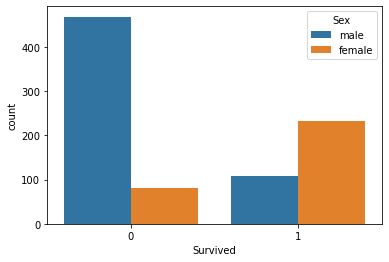

In [51]:
sns.countplot(x='Survived',hue='Sex', data=titanic_df)

<BarContainer object of 2 artists>

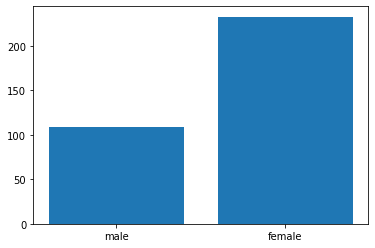

In [52]:
x=['male','female']
y = [titanic_df.groupby(['Sex','Survived'])['Survived'].count()[3],titanic_df.groupby(['Sex','Survived'])['Survived'].count()[1]]
plt.bar(x,y)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

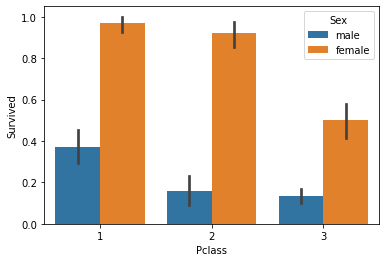

In [58]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic_df)

**참고: 오차막대(error bar)**

: 일반적으로 3가지 값을 많이 사용한다.

1. 표준편차(standard deviation, SD)
2. 표준오차 (standard error, SE)
3. 95% 신뢰구간 (95% confidence interval, CI)

## 데이터 전처리 : 구간화(binning)

### 연령대에 따른 생존자수 분포
- 연령은 수치형 변수이므로 범주형으로 구간화(binning)
- Age의 값 종류가 많기 때문에 범위별로 분류해 카테고리 값 할당
- 입력 age에 따라 구분값을 반환하는 함수 설정
- DataFrame의 apply lambda식에 사용

In [59]:
# 입력 age에 따라 구분값을 반환하는 함수 설정
def get_category_age(age):
    result = ''
    if age < 0:
        result = 'Unknown'
    elif age <= 5:
        result = 'Baby'
    elif age <= 12:
        result = 'child'
    elif age <= 18:
        result = 'Teenager'
    elif age <= 25:
        result = 'Student'
    elif age <= 35:
        result = 'Young Adult'
    elif age <= 60:
        result = 'Adult'
    else : 
        result = 'Elderly'
    return result

In [60]:
get_category_age(-1)

'Unknown'

In [61]:
get_category_age(68)

'Elderly'

In [62]:
get_category_age(26)

'Young Adult'

In [63]:
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category_age(x))

In [65]:
# 나이대 기준을 내가 주는 거에 따라 다르기 때문에 파생변수
titanic_df['Age_cat'].value_counts()

Young Adult    373
Adult          195
Student        162
Teenager        70
Baby            44
child           25
Elderly         22
Name: Age_cat, dtype: int64

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

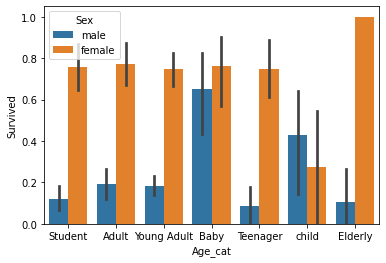

In [66]:
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = titanic_df)

## 데이터 전처리 : 인코딩

In [67]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Age_cat      891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


### 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환

In [69]:
# 레이블 인코딩처리 함수 정의 encode_features(df)
from sklearn.preprocessing import LabelEncoder

features = ['Sex', 'Cabin', 'Embarked']
for feature in features:
    # 인코더 객체 생성
    le = LabelEncoder()
    # 인코딩 : fit, transform()
    le.fit(titanic_df[feature])
    le.transform(titanic_df[feature])
    titanic_df[feature] = le.transform(titanic_df[feature])
    
titanic_df.head()

LabelEncoder()

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

LabelEncoder()

array([7, 2, 7, 2, 7, 7, 4, 7, 7, 7, 6, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3,
       7, 0, 7, 7, 7, 2, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 3, 7, 1, 2, 7, 7, 7, 7, 7, 1, 2, 7, 7, 7,
       5, 7, 7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       2, 7, 7, 7, 4, 7, 7, 7, 0, 3, 7, 7, 7, 7, 3, 7, 7, 7, 7, 7, 7, 7,
       2, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 4, 3, 7, 7, 7, 5, 7, 7, 7,
       7, 7, 7, 7, 3, 2, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 2, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 7, 7, 7, 1, 7, 7, 7, 0, 7,
       7, 2, 7, 7, 7, 7, 7, 5, 7, 0, 7, 7, 7, 7, 7, 7, 7, 5, 1, 1, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 0, 7, 7, 7, 7, 7, 3, 7, 7, 3, 7,
       7, 7, 7, 7, 2, 7, 7, 7, 7, 7, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 2, 7, 7, 3, 7, 7, 6, 2, 7, 7, 7, 7, 1, 7, 7, 7, 7, 4, 1,
       7, 7, 7, 7, 2, 2, 7, 7, 7, 2, 7, 3, 7, 7, 7, 7, 7, 7, 7, 7, 0, 7,
       7, 7, 7, 7, 7, 1, 3, 7, 7, 7, 7, 2, 2, 1, 7,

LabelEncoder()

array([3, 0, 3, 3, 3, 2, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 2, 3, 3, 0, 3, 3,
       2, 3, 3, 3, 0, 3, 2, 3, 0, 0, 2, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0,
       2, 3, 2, 2, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 1, 3, 3, 0, 0,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 0, 3, 3, 0, 3, 2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 2, 3, 0, 3, 0, 3,
       3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 0, 3,
       3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 0, 0, 2, 3,
       2, 3, 3, 3, 3, 0, 3, 3, 3, 0, 2, 0, 3, 3, 3, 3, 2, 0, 3, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2,
       3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 0, 3, 2, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 0,
       3, 3, 3, 2, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0, 2,

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,Young Adult


## 데이터 전처리 : 삭제

In [70]:
titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace=True)
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_cat
0,0,3,1,22.000000,1,0,7.2500,7,3,Student
1,1,1,0,38.000000,1,0,71.2833,2,0,Adult
2,1,3,0,26.000000,0,0,7.9250,7,3,Young Adult
3,1,1,0,35.000000,1,0,53.1000,2,3,Young Adult
4,0,3,1,35.000000,0,0,8.0500,7,3,Young Adult
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,7,3,Young Adult
887,1,1,0,19.000000,0,0,30.0000,1,3,Student
888,0,3,0,29.699118,1,2,23.4500,7,3,Young Adult
889,1,1,1,26.000000,0,0,30.0000,2,0,Young Adult


In [71]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int64  
 8   Embarked  891 non-null    int64  
 9   Age_cat   891 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 69.7+ KB


---

###### 지금 까지 가공한내용을  정리하고 함수로 작성 (재사용 가능) #######

In [80]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    # Age, Cabin, Embarked
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    return df
# 불필요한 속성 제거
def drop_features(df):
    # PassengerId, Name, Ticket 제거
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행 
def format_features(df):
    # Cabin의 첫문자 추출
    df['Cabin'] = df['Cabin'].str[:1]
    # Cabin, Sex, Embarked 를 LabelEncoding
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_dataFrame(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

---

## 생존자 예측 프로세스

### 1단계. 데이터 로딩
- 피처 데이터셋, 레이블 데이터셋 추출

In [72]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv('datasets/titanic/train.csv')

# Target dataset
y = titanic_df['Survived']

# Input dataset : 'Survived' 칼럼 제외
X = titanic_df.drop('Survived', axis=1)

In [73]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


### 2단계. 데이터 전처리
- 피처 데이터 세트에 transform_features()를 적용해 데이터 가공

In [81]:
# 데이터 전처리 함수 호출
X = transform_dataFrame(X)

In [83]:
# 생존자 예측을 수행할 피처 데이터 세트 완성
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


### 3단계. Data Split : 학습 데이터/테스트 데이터

In [84]:
# 학습 / 테스트 데이터 세트 분리
# 테스트 데이터 세트 : 20%

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

### 4단계. 분류 알고리즘을 적용한 학습/예측/평가

* 3개의 ML 알고리즘 수행  
     - 결정 트리, 랜덤 포레스트, 로지스틱 회귀(분류)
* 이 3개의 알고리즘으로 예측 수행하고 
* 교차 검증으로 평가

사이킷런 클래스
* 결정 트리 : DecisionTreeClassifier
* 랜덤 포레스트 : RandomForestClassifier
* 로지스틱 회귀 : LogisticRegression
    
train_test_split()으로 분리한 학습 데이터와 테스트 데이터를 기반으로
* 머신러닝 모델을 학습하고(fit), 예측 수행(predict)
* 예측 성능 평가 :  정확도 (accuracy_score() 사용)

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print(f'결정트리 정확도 : {accuracy_score(y_test, pred)}')

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(f'랜덤포레스트 정확도 : {accuracy_score(y_test, pred)}')

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
print(f'로지스틱회귀 정확도 : {accuracy_score(y_test, pred)}')

#  랜덤포레스트가 기본적으로 높게 나온다

DecisionTreeClassifier(random_state=11)

결정트리 정확도 : 0.8100558659217877


RandomForestClassifier(random_state=11)

랜덤포레스트 정확도 : 0.8324022346368715


LogisticRegression()

로지스틱회귀 정확도 : 0.8156424581005587


### 5단계. 교차 검증을 통한 모델 성능 향상
: 결정 트리 모델 좀 더 평가
* 사이킷런 model_selection 패키지의 
    - KFold 클래스, cross_val_score(), GridSearchCV 클래스 사용

In [105]:
# 결정 트리 모델에 대해 KFold 클래스를 이용해 교차 검증 수행 
# 폴드 개수 : 5
from sklearn.model_selection import KFold

def exec_kfold(clf, k=5):
    kfold = KFold(n_splits=k)
    scores = []
    
    
    n = 1
    # X가 데이터 프레임이기 때문에 values를 써야 array값을 받아 올 수 있다
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X.values[train_idx], X.values[test_idx]
        y_train, y_test = y.values[train_idx], y.values[test_idx]
        
        # 학습
        clf.fit(X_train, y_train)
        
        # 예측
        pred = clf.predict(X_test)
        
        # 평가
        acc = accuracy_score(y_test, pred)
        scores.append(acc)
        print(f'교차검증 {n}회')
        print('교차검증 정확도 : {0:.4f}'.format(acc))
        n += 1
    mean_acc = np.mean(scores)
    print('\n평균정확도 : {:.4}'.format(mean_acc))

In [106]:
# exec_kfold 호출
exec_kfold(dt_clf)

교차검증 1회
교차검증 정확도 : 0.7542
교차검증 2회
교차검증 정확도 : 0.7809
교차검증 3회
교차검증 정확도 : 0.7865
교차검증 4회
교차검증 정확도 : 0.7697
교차검증 5회
교차검증 정확도 : 0.8202

평균정확도 : 0.7823


In [107]:
# X_titanic_df와 X_titanic_df.values[train_index]
exec_kfold(dt_clf, 10)

교차검증 1회
교차검증 정확도 : 0.7333
교차검증 2회
교차검증 정확도 : 0.7753
교차검증 3회
교차검증 정확도 : 0.7416
교차검증 4회
교차검증 정확도 : 0.7528
교차검증 5회
교차검증 정확도 : 0.8090
교차검증 6회
교차검증 정확도 : 0.8090
교차검증 7회
교차검증 정확도 : 0.8090
교차검증 8회
교차검증 정확도 : 0.7640
교차검증 9회
교차검증 정확도 : 0.8652
교차검증 10회
교차검증 정확도 : 0.8427

평균정확도 : 0.7902


In [108]:
exec_kfold(lr_clf)

교차검증 1회
교차검증 정확도 : 0.8045
교차검증 2회
교차검증 정확도 : 0.7809
교차검증 3회
교차검증 정확도 : 0.7753
교차검증 4회
교차검증 정확도 : 0.7584
교차검증 5회
교차검증 정확도 : 0.8202

평균정확도 : 0.7879


In [109]:
exec_kfold(rf_clf)

교차검증 1회
교차검증 정확도 : 0.7933
교차검증 2회
교차검증 정확도 : 0.8090
교차검증 3회
교차검증 정확도 : 0.8371
교차검증 4회
교차검증 정확도 : 0.7753
교차검증 5회
교차검증 정확도 : 0.8596

평균정확도 : 0.8148


In [ ]:
######### 참고: 피처 데이터 세트 확인 


In [ ]:
######### 참고: index 값 출력


In [ ]:
######### 참고 : KFold에서 train_index, test_index 확인 #####



- cross_val_score()를 이용해 교차 검증 수행

In [117]:
# cross_val_score()를 이용해 교차 검증 수행
from sklearn.model_selection import cross_val_score

# cross_val_score(estimator, data, label, 폴드 수)
scores = cross_val_score(dt_clf, X, y, cv=5)

for i, acc in enumerate(scores):
    print('교차검증{0} : 정확도 {1:.4f}'.format(1, acc))
print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))

교차검증1 : 정확도 0.7430
교차검증1 : 정확도 0.7753
교차검증1 : 정확도 0.7921
교차검증1 : 정확도 0.7865
교차검증1 : 정확도 0.8427
평균 정확도 : 0.7879


### 6단계. 하이퍼파라미터 튜닝

- GridSearchCV 클래스를 이용해 하이퍼 파리미터를 튜닝

In [115]:
# GridSearchCV 클래스를 이용해 하이퍼 파리미터를 튜닝
from sklearn.model_selection import GridSearchCV
# DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능 측정
# CV : 5개의 폴드 세트 지정
# 하이퍼 파라미터 : max_depth, min_samples_split, min_samples_leaf 

params = {'max_depth' : [2, 3, 5, 10], 'min_samples_leaf': [1, 5, 7], 'min_samples_split': [2, 3, 5]}

grid_clf = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5)

grid_clf.fit(X, y)
print('최적의 하이처 파라미터', grid_clf.best_params_)
print('최고 정확도', grid_clf.best_score_)
best_clf = grid_clf.best_estimator_

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 7],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

최적의 하이처 파라미터 {'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 2}
최고 정확도 0.8227229929069111


In [116]:
# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
pred = best_clf.predict(X_test)
accuracy_score(y_test, pred)

0.8938547486033519